# 4. Integration
(18 points total)
## 4.1 Ferret
Here we explore numerical integration using [Ferret](https://ferret.pmel.noaa.gov/Ferret/), which is software to analyize gridded data often stored in netcdf files.

💡Tip: The `search` function in the Ferret webpage is particularly useful.

This notebook uses [ferretmagic](https://pypi.org/project/ferretmagic/) for the python-Ferret coupling. To invoke Ferret in a python notebook you need to execute the following line before you can use Ferret commands.

In [1]:
%load_ext ferretmagic

Ferret is great for gridded data, quick visualization and basic analysis such as differentiation and integration. Cells with Ferret commands need to be prefaced with `%%ferret`. To load a netcdf dataset simply type `use dataset` like here for the Levitus data that comes with Ferret. It is an average of observations.

In [2]:
%%ferret
use levitus_climatology
show data

currently SET data sets:
 1> /usr/share/ferret-vis/data/levitus_climatology.cdf (default)
 name title I J K L
 TEMP TEMPERATURE 1:360 1:180 1:20 ...
 SALT SALINITY 1:360 1:180 1:20 ...

`show data` gives a summary of the dataset its variable names (in this case TEMP and SALT) and dimensions (I,J,K,L). Typically, I represents longitude, J latitude, K depth or height, and L time. In this case there is are 360x180 grid points in the horizontal (a 1 degree x 1 degree grid), 20 levels in the vertical, and only one snapshot in time.

The cell below shows how easy it is to get a quick look at data in ferret. `shade` produces a color contour plot.


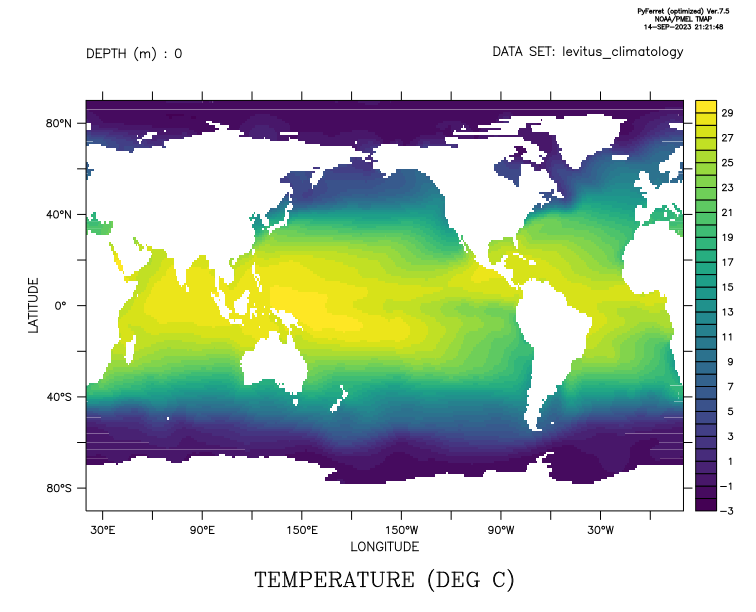

In [3]:
%%ferret
shade temp[k=1]

`contour`, or `con` for short, plots line contours. The `/o` qualifier overlays.


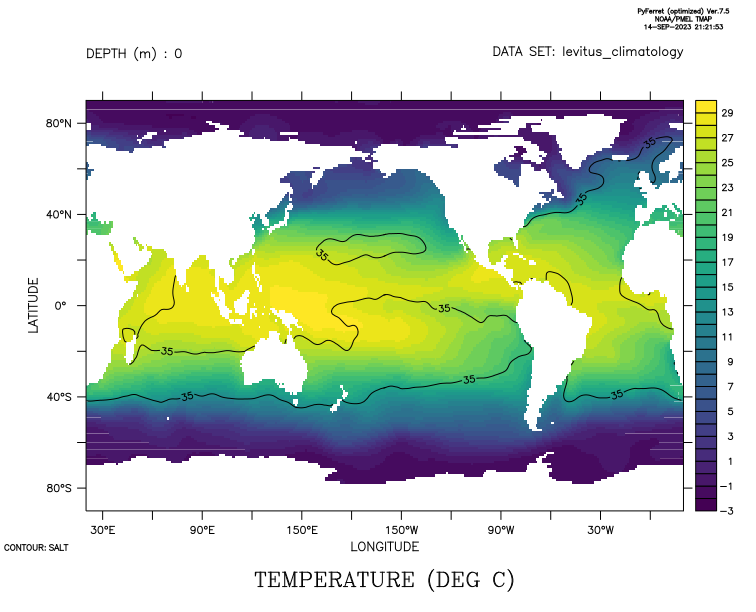

In [4]:
%%ferret
shade temp[k=1]
con/o/lev=(35) salt[k=1]

We had to specify the depth level since shade can plot only 2-dimensional data. To plot a one-dimensional (line) plot you need to specify two dimensions.


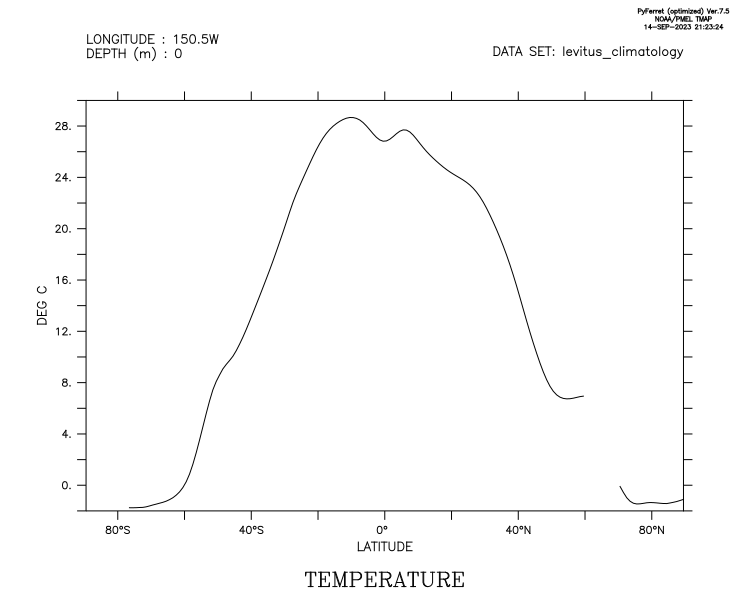

In [8]:
%%ferret
pl temp[k=1,x=150w]

You can easily overlay lines.


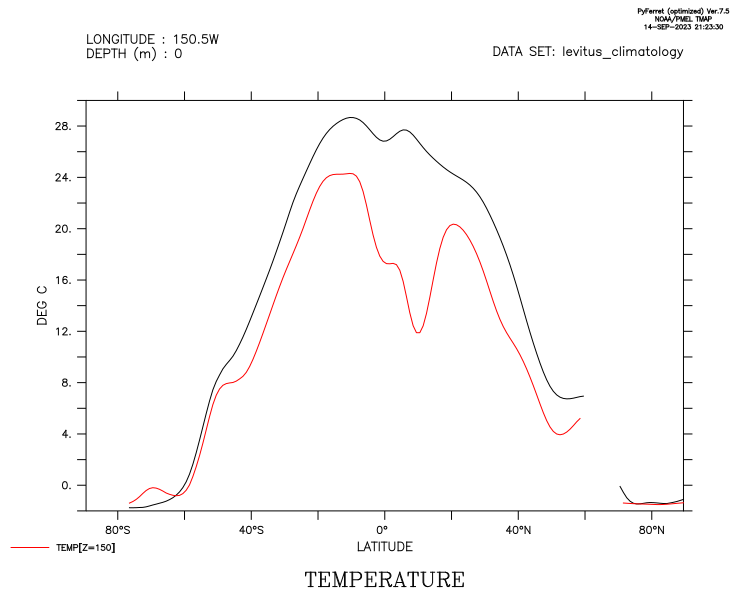

In [9]:
%%ferret
pl temp[k=1,x=150w]
pl/o temp[k=8,x=150w]

You can specify either the grid index (in this case k) or the spatial dimension (z in meters).


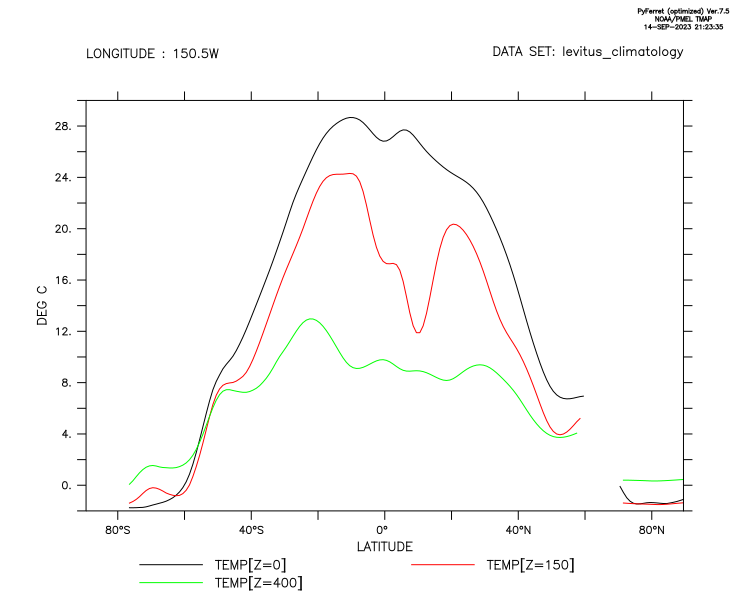

In [10]:
%%ferret
! overlay three curves in one line of code:
pl temp[z=0,x=150w], temp[z=150,x=150w], temp[z=500,x=150w]

- Create color-shaded contour plots of temperature and salinity along two latitude-depth sections, one through the Pacific at 150W, and one through the Atlantic at 20W.

(4 points)

Ferret has a number of basic [transformations](https://ferret.pmel.noaa.gov/Ferret/documentation/users-guide/variables-xpressions/XPRESSIONS#_VPINDEXENTRY_418) such as averaging, differentiation, integration, filters and such.

In [10]:
%%ferret

show transforms

variable transforms e.g.SST[T=1-jan:15-mar@DDC]
 code description code description
 ---- ----------- ---- -----------
 @ITP interpolated @FAV ave-filled
 @AVE averaged @FLN linear-filled
 @VAR variance @FNR nearest-filled
 @SUM summed @NGD number of valid
 @RSU running sum @NBD number flagged bad
 @SHF shifted @LOC location
 @MIN minimum @WEQ weighted equal
 @MAX maximum @CDA closest dist above
 @DDC centered derivative @CDB closest dist below
 @DDF forward derivative @CIA closest index above
 @DDB backwards derivative @CIB closest index below
 @DIN integrated @EVN event mask
 @IIN indef. integ. @MED median smoothed
 @SBX box smoothed @SMX maximum smoothed
 @SBN binomial smoothed @SMN minimum smoothed
 @SWL Welch smoothed @STD standard deviation
 @SHN Hanning smoothed @WGT weights for avg,int
 @SPZ Parzen smoothed @SPX box smooth w/missing
 
regridding transforms e.g.SST[GX=x5deg@AVE]
 code description code description
 ---- ----------- ---- -----------
 @LIN lin. interp. @MODVAR modulo var
 @AVE area-wgtd avgd @MODNGD # gd mod pts
 @XACT exact match @MODNBD #bad mod pts
 @ASN index assn @MODSUM modulo sum
 @VAR variance @MODMIN modulo min
 @MIN minimum @MODMAX modulo max
 @MAX maximum @NRST nearst coord
 @SUM area-wgtd sum @BIN unwgtd avg
 @NGD #gd pts, area wgtd @NBIN #good in bin
 @MOD modulo ave @IIN #indef integral
 
auxiliary varible regridding transforms e.g.TEMP[GZ(depth)=zax@AVE]
 code description code description
 ---- ----------- ---- -----------
 @LIN lin. interp. @PLAVE pc-wise linear ave

For example, the code below plots the zonally averaged sea surface salinity (SSS).


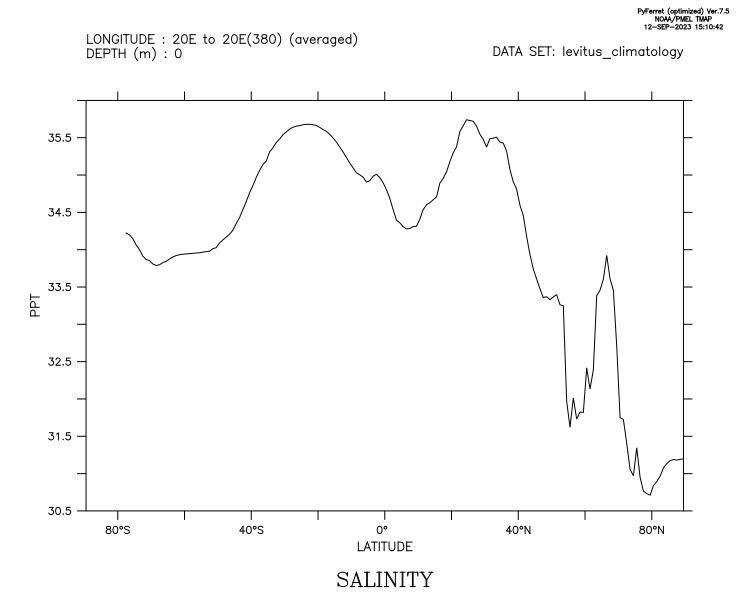

In [11]:
%%ferret

pl salt[x=@ave,k=1]

- Create a line plot of the meridional gradient (derivative) of zonally averaged surface temperatures using the centered difference approximation. (2 points)

Since metadata such as latitude and longitude are included in the netcdf files, Ferret is able to quickly calculate derivatives (both spatial and temporal gradients) and integrals in spherical coordinates. Whereas in python you'd have to explicitly calculate $\Delta x = Rcos(\phi)\Delta\lambda$ and $\Delta y = R\Delta\phi$, where $\lambda$ is longitude, $\phi$ latitude and $R$ is Earth's radius, multiply it with your variable and sum to calculate the integral, in ferret this is accomplished by just adding `[x=@din,y=@din]` to a variable.

Now, let's open a new dataset. The top-of-the-atmosphere radiative fluxes from the Earth Radiation Budget Experiment (ERBE) satellite data.

In [12]:
%%ferret
use "/data/ATS_421_521/Data/ERBE_mean_updated.cdf"
sh da
! you can abbreviate ferret commands; sh da = show data

currently SET data sets:
 1> /usr/share/ferret-vis/data/levitus_climatology.cdf
 name title I J K L
 TEMP TEMPERATURE 1:360 1:180 1:20 ...
 SALT SALINITY 1:360 1:180 1:20 ...
 
 2> /data/ATS_421_521/Data/ERBE_mean_updated.cdf (default)
 name title I J K L
 NET Net radiation 1:128 1:64 ... ...
 (T=30-JAN-1985 05:00:30-APR-1989 11:00)
 SOLAR Solar insolation 1:128 1:64 ... ...
 (T=30-JAN-1985 05:00:30-APR-1989 11:00)
 OLR Outgoing longwave radiation 1:128 1:64 ... ...
 (T=30-JAN-1985 05:00:30-APR-1989 11:00)
 REFL Reflected shortwave radiation 1:128 1:64 ... ...
 (T=30-JAN-1985 05:00:30-APR-1989 11:00)
 ASR Absorbed solar radiation 1:128 1:64 ... ...
 (T=30-JAN-1985 05:00:30-APR-1989 11:00)

- Explore the ERBE dataset by creating color-shaded contour plots of the five variables.

(5 points)


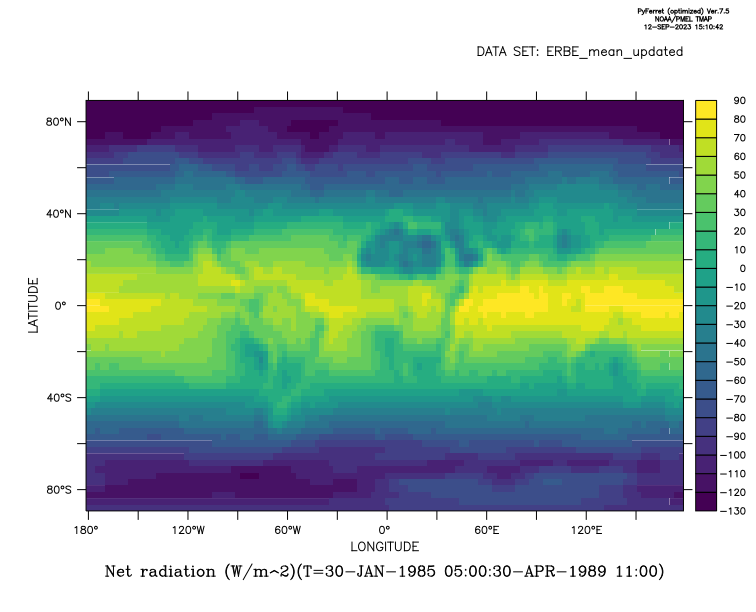

In [13]:
%%ferret
shade net

The net radiation balance NET = ASR - OLR is the absorbed solar radiation ASR = (1-a)SOLAR minus the outgoing longwave radiation (OLR), where SOLAR is the incoming solar radiation and a is the albedo (a*SOLAR = REFL is the reflected solar radiation e.g. due to clouds or ice). An imbalance between ASR and OLR leads to net heating or cooling. Current global warming is caused by an increases in atmospheric CO$_2$, which decreases OLR).

- Use ferret to plot zonally-averaged ASR, OLR and NET in one figure (3 points)


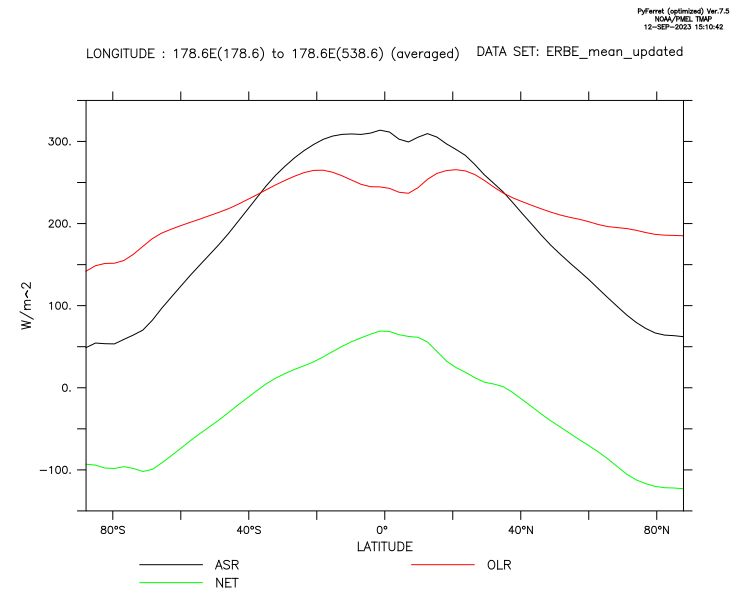

In [14]:
%%ferret
pl asr[x=@ave],olr[x=@ave],net[x=@ave]

If ASR > OLR, or NET > 0, this implies the climate system gains heat from the top-of-the-atmosphere radiative fluxes. ASR < OLR (NET < 0) implies heat loss. If there was no heat transport in the atmosphere and ocean, this would imply temperatures would increase where ASR > OLR and decrease where ASR < OLR. However, Earth's climate system is approximately at equilibrium (not considering the anthropogenic perturbation), which implies heat transport from the tropics, where NET > 0 to the high latitudes, where NET < 0. The magnitude of the meridional heat transport $F = \int\int NET dxdy$ can be calculated from the TOA radiative imbalance (NET), where the integration over x (longitude) goes over all longitudes (0-360), and thus is a definite integral (@din in Ferret), whereas the integration over latitude starts at the South Pole (where the meridional heat flux is zero) and goes to latitude y, and thus is an indefinite integral (@iin in Ferret),

- Calculate and plot the meridional heat flux in the Earth's climate system in Petawatts (PW = 10$^{15}$W). (4 points)